# <font color=blue>London bike sharing dataset</font>
#### Historical data for bike sharing in London 'Powered by TfL Open Data' from years 2015 and 2016

#### Research done by
<font color=blue>Ashish Kumar Chhetri</font>, <font color=blue>Harsimran Singh</font> and <font color=blue>Saroj Adhikari</font>


#### Introduction
In this notebook, we will do research to predict the bike-sharing numbers depending on different times and weather conditions.

Bike-sharing is helping a lot to reduce the traffic in a city and it has also played a crucial role to save the environment. Through this research, we will figure out the demand for the bike-sharing on different circumstances so that the company can manage accordingly.

Dataset: https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

#### Area of interest
Bike-sharing business is high in demand in today’s world. All government motivating their citizens to use bicycles to save the environment whereas businesses are coming up with innovative ideas to make a profit from this. This business is depending upon different factors i.e. Area, weather, and time.

#### Goal
The goal of this project to analyze this dataset and predict the future of the use of bikes. This project will analyze what are the different factors that affect the use of bicycles and what conditions people prefer most to use the bikes. Our goal is to analyze the dataset with the knowledge that we have gained during lectures.

#### Dataset
The data set acquired the data from three different sources Https://cycling.data.tfl.gov.uk/,freemeteo.com - weather data, https://www.gov.uk/bank-holidays. Cycling dataset is grouped by ‘Start time’ which represents the count of new bikes grouped by the hour for a year from 2015 – 2016.

Dataset: https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

#### How will the dataset be helpful to solve the business problem?
During our research to find the perfect dataset for our project, we have found this dataset which has the potential to predict the future of bike-sharing. The dataset has the records of bike-sharing on different seasons, weather, days (public holidays, weekends) etc. which any new business would like to know in advance. We will try to represent the data as simple as possible with the use of different graphs so all readers can understand it.

In conclusion, due to the increase in population, the number of vehicles is increasing on roads which are the main source of air pollution. The government are aware to reduce the air pollution they must motivate their citizens to use public transport and build safe roads for cycling in metropolitan cities. Many businesses have already put their focus in this field, and many are thinking. So, we have a perfect dataset to give an overview of the use of bikes in London.



## <font color=blue>Loading data into R</font>
In this section we'll load and assign .csv
file.

In [1]:
url <- "./data/london_merged.csv"
bike <- read.csv(url, stringsAsFactors = FALSE)

#### Look at the bit of data

In [2]:
str(bike)

'data.frame':	17414 obs. of  10 variables:
 $ timestamp   : chr  "2015-01-04 00:00:00" "2015-01-04 01:00:00" "2015-01-04 02:00:00" "2015-01-04 03:00:00" ...
 $ cnt         : int  182 138 134 72 47 46 51 75 131 301 ...
 $ t1          : chr  "3.0" "3.0" "2.5" "2.0" ...
 $ t2          : num  2 2.5 2.5 2 0 2 -1 -1 -1 -0.5 ...
 $ hum         : num  93 93 96.5 100 93 93 100 100 96.5 100 ...
 $ wind_speed  : num  6 5 0 0 6.5 4 7 7 8 9 ...
 $ weather_code: num  3 1 1 1 1 1 4 4 4 3 ...
 $ is_holiday  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ is_weekend  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ season      : num  3 3 3 3 3 3 3 3 3 3 ...


#### Description of different variables

* <font color=red>timestamp</font> - timestamp field for grouping the data
* <font color=red>cnt</font> - the count of a new bike shares
* <font color=red>t1</font> - real temperature in C
* <font color=red>t2</font> - temperature in C "feels like"
* <font color=red>hum</font> - humidity in percentage
* <font color=red>windspeed</font> - wind speed in km/h
* <font color=red>weathercode</font> - category of the weather
* <font color=red>isholiday</font> - boolean field - 1 holiday / 0 non holiday
* <font color=red>isweekend</font> - boolean field - 1 if the day is weekend
* <font color=red>season</font> - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

##### "weathe_code" category description:
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog



## <font color=blue>Data cleaning</font>

#### Clear problems that are alredy existed. These are

* Change data type of <font color=red>**t1**</font> variable to num
* Change data type of <font color=red>**timestamp**</font> variable to date and time
* Change data type of <font color=red>**weather_code**</font> variable to factor (defining different levels)
* Change data type of <font color=red>**is_holiday**</font> variable to factor (defining different levels)
* Change data type of <font color=red>**is_weekend**</font> variable to factor (defining different levels)
* Change data type of <font color=red>**season**</font> variable to factor (defining different levels)

#### Missiung value
Let's check the missing value

In [3]:
table(is.na(bike))


 FALSE 
174140 

This function shows us ``bike`` does not have any ``NA`` values.

In [4]:
library(stringr) #[Manipulates characters]

#### Convert "t1" to num

In [5]:
## Let's find the bad data first.

bad_data <- str_subset(bike$t1, "[a-z A-Z]")
bad_data

[1] "12.0 Twelve"

As you can see we have one `Twelve` in one of the field. Let's find the location of this error and we can set it to number `12.0`.

In [6]:
locations <- str_detect(bike$t1, bad_data)
bike[locations, ]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
12393,2016-06-06 05:00:00,140,12.0 Twelve,12,88,10,3,0,0,1


Now, we can replace this error in the following way to fix an error.

i.e. We know that it was because of some mistake we have "12.0 Twelve".

In [7]:
bike$t1 <- str_replace(bike$t1, "12.0 Twelve", "12.0")
bike[locations, ]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
12393,2016-06-06 05:00:00,140,12.0,12,88,10,3,0,0,1


Now let's convert the data type of t1 to num and check the result

In [8]:
bike$t1 <- as.numeric(bike$t1)
str(bike$t1)

 num [1:17414] 3 3 2.5 2 2 2 1 1 1.5 2 ...


#### Other conversions

In [9]:
## Converting timestamp format to date and time
bike$timestamp <- strptime(bike$timestamp, format = '%Y-%m-%d %H:%M:%S')

str(bike$timestamp)

 POSIXlt[1:17414], format: "2015-01-04 00:00:00" "2015-01-04 01:00:00" "2015-01-04 02:00:00" ...


In [10]:
## Converting weather code to factor
bike$weather_code <- factor(bike$weather_code, levels = c(1, 2, 3, 4, 7, 10, 26, 94),
 labels = c("Mostly clear", "Scattered clouds / few clouds", "Broken clouds", "Cloudy", "Rain / Light - shower / Light", "Rain with thunderstorm", "Snowfall", "Freezing fog"))
str(bike$weather_code)

 Factor w/ 8 levels "Mostly clear",..: 3 1 1 1 1 1 4 4 4 3 ...


In [11]:
## Converting is_holiday to factor
bike$is_holiday <- factor(bike$is_holiday, levels = c(0, 1),
 labels = c("Not a holiday", "Holiday"))
str(bike$is_holiday)

 Factor w/ 2 levels "Not a holiday",..: 1 1 1 1 1 1 1 1 1 1 ...


In [12]:
## Converting is_weekend to factor
bike$is_weekend <- factor(bike$is_weekend, levels = c(0, 1),
 labels = c("workdays", "Weekend"))
str(bike$is_weekend)

 Factor w/ 2 levels "workdays","Weekend": 2 2 2 2 2 2 2 2 2 2 ...


In [13]:
## Converting season to factor
bike$season <- factor(bike$season, levels = c(0, 1, 2, 3),
 labels = c("Spring", "Summer", "Fall", "Winter"))
str(bike$season)

 Factor w/ 4 levels "Spring","Summer",..: 4 4 4 4 4 4 4 4 4 4 ...


#### Let's look at the bit of date to make sure all the variables are in correct format

In [14]:
str(bike)

'data.frame':	17414 obs. of  10 variables:
 $ timestamp   : POSIXlt, format: "2015-01-04 00:00:00" "2015-01-04 01:00:00" ...
 $ cnt         : int  182 138 134 72 47 46 51 75 131 301 ...
 $ t1          : num  3 3 2.5 2 2 2 1 1 1.5 2 ...
 $ t2          : num  2 2.5 2.5 2 0 2 -1 -1 -1 -0.5 ...
 $ hum         : num  93 93 96.5 100 93 93 100 100 96.5 100 ...
 $ wind_speed  : num  6 5 0 0 6.5 4 7 7 8 9 ...
 $ weather_code: Factor w/ 8 levels "Mostly clear",..: 3 1 1 1 1 1 4 4 4 3 ...
 $ is_holiday  : Factor w/ 2 levels "Not a holiday",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ is_weekend  : Factor w/ 2 levels "workdays","Weekend": 2 2 2 2 2 2 2 2 2 2 ...
 $ season      : Factor w/ 4 levels "Spring","Summer",..: 4 4 4 4 4 4 4 4 4 4 ...


## <font color=blue>Now data is ready for the analysis</font>
Let's look at the relations between every column through pairs. It makes easy for us to guess the relationships.

In [15]:
## Installing library
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ readr   1.3.1
✔ tibble  2.1.3     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ dplyr   0.8.4
✔ ggplot2 3.2.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


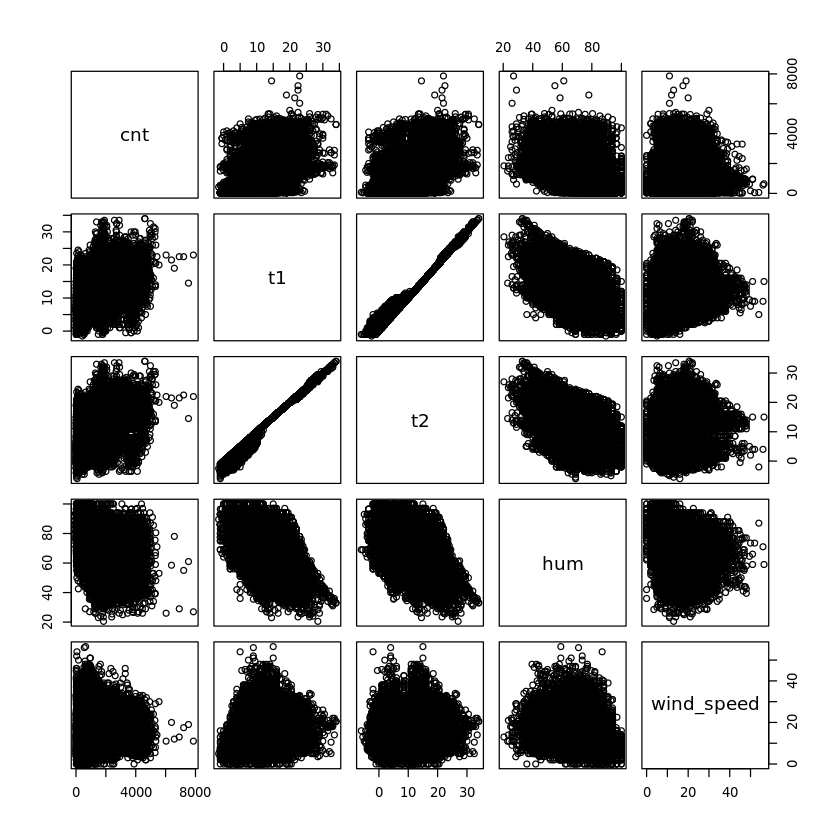

In [16]:
pairs(select(bike, cnt, t1, t2, hum, wind_speed))

The output above shows the relation betweeen all the available variables. We can see that <font color=red>t1</font> and <font color=red>t2</font> shows strong positive linear relation which is obvious because it is temperature and feels like temperature. Other than that, we can see <font color=red>t1</font>, <font color=red>t2</font>, <font color=red>hum</font> and <font color=red>wind_speed</font> have some kinds of relation with each other and <font color=red>cnt</font>.

#### Now, let's visualize the data in a different way to answer more questions.

In [17]:
## Find year
bike$year <- format(bike$timestamp, format = "%Y")
bike$year <- as.factor(bike$year)
head(bike$year)

[1] 2015 2015 2015 2015 2015 2015
Levels: 2015 2016 2017

In [18]:
## Find month
bike$month <- format(bike$timestamp, format = "%m")
bike$month <- as.factor(bike$month)
head(bike$month)

[1] 01 01 01 01 01 01
Levels: 01 02 03 04 05 06 07 08 09 10 11 12

In [19]:
## Defining name for months
levels(bike$month) <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
str(bike$month)

 Factor w/ 12 levels "January","February",..: 1 1 1 1 1 1 1 1 1 1 ...


In [20]:
## Find day
bike$day <- format(bike$timestamp, format = "%d")
bike$day <- as.factor(bike$day)
head(bike$day)

[1] 04 04 04 04 04 04
31 Levels: 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 ... 31

In [21]:
## Find hour
bike$hour <- format(bike$timestamp, format = "%H")
bike$hour <- as.factor(bike$hour)
head(bike$hour)

[1] 00 01 02 03 04 05
24 Levels: 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 ... 23

#### Look at the bit of the data

In [22]:
str(bike)

'data.frame':	17414 obs. of  14 variables:
 $ timestamp   : POSIXlt, format: "2015-01-04 00:00:00" "2015-01-04 01:00:00" ...
 $ cnt         : int  182 138 134 72 47 46 51 75 131 301 ...
 $ t1          : num  3,0 3,0 2,5 2,0 2,0 2,0 1,0 1,0 1,5 2,0 ...
 $ t2          : num  2,0 2,5 2,5 2,0 0,0 2,0 -1,0 -1,0 -1,0 -0,5 ...
 $ hum         : num  93,0 93,0 96,5 100,0 93,0 93,0 100,0 100,0 96,5 100,0 ...
 $ wind_speed  : num  6,0 5,0 0,0 0,0 6,5 4,0 7,0 7,0 8,0 9,0 ...
 $ weather_code: Factor w/ 8 levels "Mostly clear",..: 3 1 1 1 1 1 4 4 4 3 ...
 $ is_holiday  : Factor w/ 2 levels "Not a holiday",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ is_weekend  : Factor w/ 2 levels "workdays","Weekend": 2 2 2 2 2 2 2 2 2 2 ...
 $ season      : Factor w/ 4 levels "Spring","Summer",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ year        : Factor w/ 3 levels "2015","2016",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month       : Factor w/ 12 levels "January","February",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day         : Factor w/ 31 levels "01","02

As you can see we have four new variables which is <font color=red>year</font>, <font color=red>month</font>, <font color=red>day</font> and <font color=red>hour</font>. Now we can analysize number of bookings during the different times.

In [23]:
summary(bike$cnt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     257     844    1143    1672    7860 

This shows that the highest number of booking is 7860 and where the lowest is 0. Now we can see which factor affects the booking.

#### How's the demand of bike-sharing on weekdays and weekend?

In [24]:
summary(bike$is_weekend) 

workdays  Weekend 
   12444     4970

Above result shows that demand on workdays is very high comparing Weekend. 

#### How's the demand of bike-sharing on holiday and when it is not a holiday?

In [25]:
summary(bike$is_holiday) 

Not a holiday       Holiday 
        17030           384

Above result shows that demand on holiday is very low comparing when it is not a holiday. 

#### How's the demand in different season and the month?

In [26]:
summary(bike$season) 

Spring Summer   Fall Winter 
  4394   4387   4303   4330

Above result shows that demand on all the seasons is almost the same. 

#### How's the booking on a different time of the month?

In [27]:
summary(bike$month) 

January  February     March     April       May      June      July    August 
     1487      1359      1468      1438      1488      1422      1481      1484 
September   October  November  December 
     1394      1479      1430      1484

Above result shows that demand on all the months is almost the same except there's little difference on February. 

#### How's the booking on a different time of the day?

In [28]:
summary(bike$hour)

00  01  02  03  04  05  06  07  08  09  10  11  12  13  14  15  16  17  18  19 
724 724 721 721 721 721 726 726 724 727 725 727 729 728 728 729 730 728 728 727 
 20  21  22  23 
727 726 725 722

Above result shows that demand on all time of the day is almost the same.

#### How's the demand on different weather situations?

In [29]:
summary(bike$weather_code) 

Mostly clear Scattered clouds / few clouds 
                         6150                          4034 
                Broken clouds                        Cloudy 
                         3551                          1464 
Rain / Light - shower / Light        Rain with thunderstorm 
                         2141                            14 
                     Snowfall                  Freezing fog 
                           60                             0

## <font color=blue>Let's find the relations between variables.</font>

We have already found out that demand of bike-sharing depends upon <font color=red>Weather</font>, <font color=red>Holidays</font>, <font color=red>Season</font> and if it is <font color=red>Weekend</font> or <font color=red>Weekdays</font>.

#### <font color=blue>Correlation between numbers of bike sharing and temperature.</font>

In [30]:
cor.test(bike$cnt, bike$t1)


	Pearson's product-moment correlation

data:  bike$cnt and bike$t1
t = 55,685, df = 17412, p-value < 2,2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0,3761178 0,4013335
sample estimates:
      cor 
0,3887985 


This shows positive correlation and it is significant.

#### <font color=blue>Correlation between numbers of bike sharing and feels like temperature.</font>

In [31]:
cor.test(bike$cnt, bike$t2)


	Pearson's product-moment correlation

data:  bike$cnt and bike$t2
t = 52,394, df = 17412, p-value < 2,2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0,3561342 0,3817948
sample estimates:
      cor 
0,3690348 


This shows positive correlation and it is significant.

#### <font color=blue>Correlation between numbers of bike sharing and humidity.</font>

In [32]:
cor.test(bike$cnt, bike$hum)


	Pearson's product-moment correlation

data:  bike$cnt and bike$hum
t = -68,909, df = 17412, p-value < 2,2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0,4744914 -0,4511501
sample estimates:
      cor 
-0,462901 


This shows negative correlation and it is significant.

#### <font color=blue>Correlation between numbers of bike sharing and wind speed.</font>

In [33]:
cor.test(bike$cnt, bike$wind_speed)


	Pearson's product-moment correlation

data:  bike$cnt and bike$wind_speed
t = 15,451, df = 17412, p-value < 2,2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0,1016181 0,1309218
sample estimates:
      cor 
0,1162952 


This shows positive correlation and it is significant but correlation value is very low.

#### <font color=blue>Correlation between all the variables.</font>

In [34]:
cor(bike[ ,2:6])

,cnt,t1,t2,hum,wind_speed
cnt,"1,0000000","0,3887985","0,36903479","-0,4629010","0,11629523"
t1,"0,3887985","1,0000000","0,98834422","-0,4477810","0,14547097"
t2,"0,3690348","0,9883442","1,00000000","-0,4034951","0,08840854"
hum,"-0,4629010","-0,4477810","-0,40349514","1,0000000","-0,28778917"
wind_speed,"0,1162952","0,1454710","0,08840854","-0,2877892","1,00000000"


#### This concludes that the number of bike shares depend upon <font color="red">t1</font>, <font color="red">t2</font>, <font color="red">hum</font>, <font color="red">wind_speed</font> and all the other factor variables we have in the dataset.

## <font color=blue>Prediction of the variables by building a model.</font>
Let's make the model selecting variable which has the highest impact on demand of bike-sharing.

In [35]:
model <- lm(cnt ~ t1 + hum,
 data = bike)
summary(model)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = cnt ~ t1 + hum, data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-1954,8  -604,7  -251,9   332,7  5987,9 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2572,4837    51,1018   50,34   <2e-16 ***
t1            44,2168     1,4243   31,05   <2e-16 ***
hum          -27,3859     0,5544  -49,39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 936,3 on 17411 degrees of freedom
Multiple R-squared:  0,2555,	Adjusted R-squared:  0,2554 
F-statistic:  2987 on 2 and 17411 DF,  p-value: < 2,2e-16


In [36]:
newdata <- data.frame(t1 = 3, hum = 93)
predict.lm(model, newdata, interval = "predict")

fit,lwr,upr
"158,2497","-1677,304","1993,803"


#### <font color=blue>Is the model good?</font>

#### Linearity


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



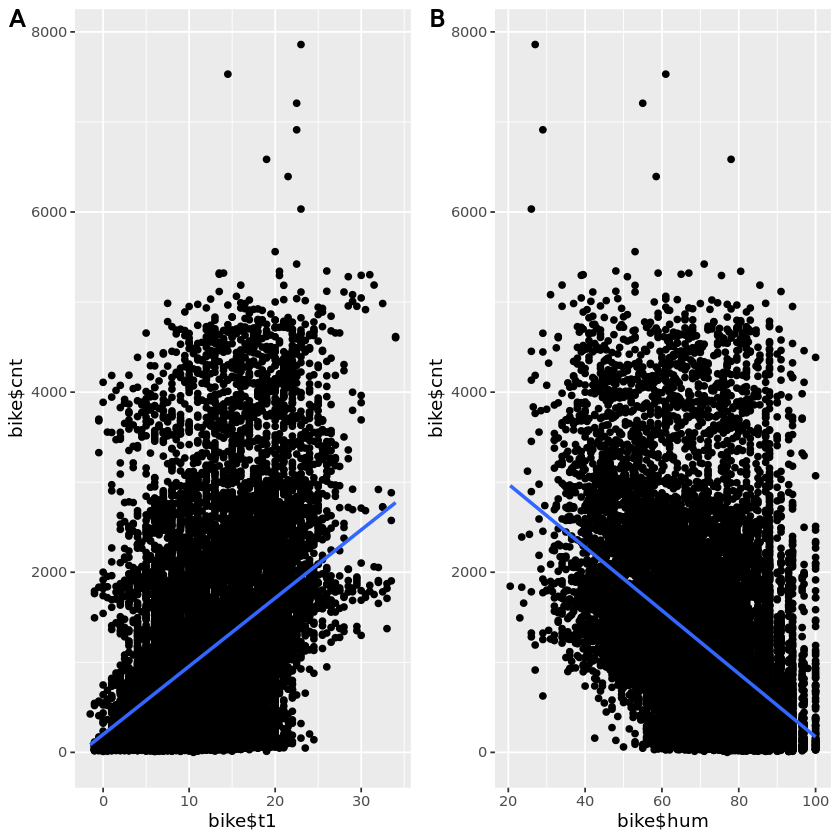

In [37]:
library(cowplot)

tempplot <- ggplot() + geom_point(aes(x = bike$t1, y = bike$cnt)) + geom_smooth(aes(x = bike$t1, y = bike$cnt), method = "lm", se = FALSE)
humplot <- ggplot() + geom_point(aes(x = bike$hum, y = bike$cnt)) + geom_smooth(aes(x = bike$hum, y = bike$cnt), method = "lm", se = FALSE)


plot_grid(tempplot, humplot, labels = "AUTO")

It is following linear.

#### Independence

All the predictor variables are independent.

#### Normality

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


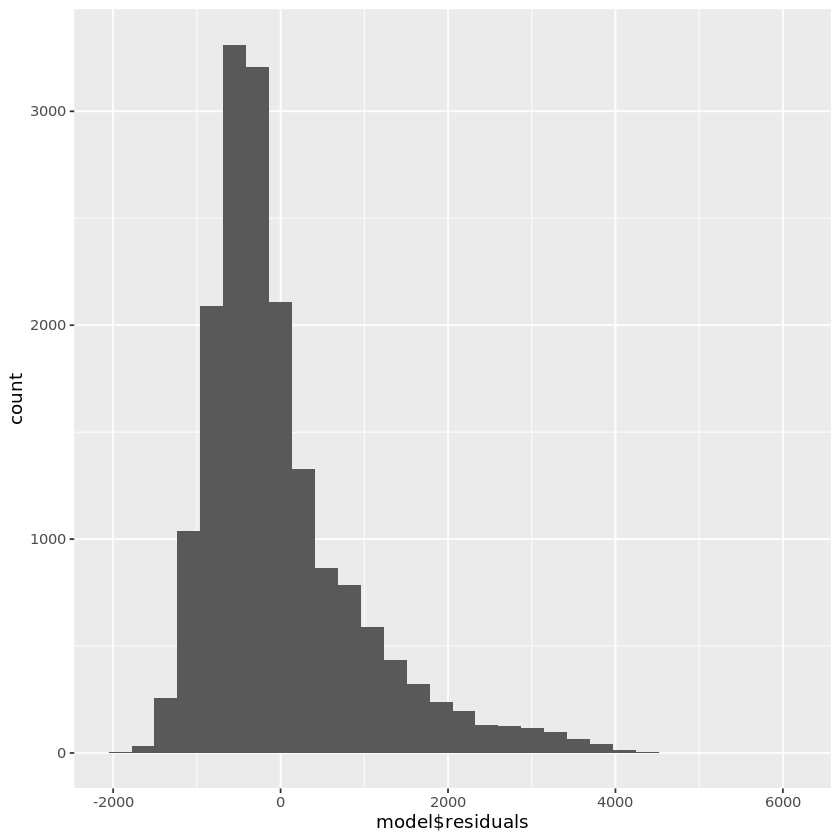

In [38]:
ggplot() + geom_histogram(aes(model$residuals))

This is fairly close to normal.

#### Equal variance

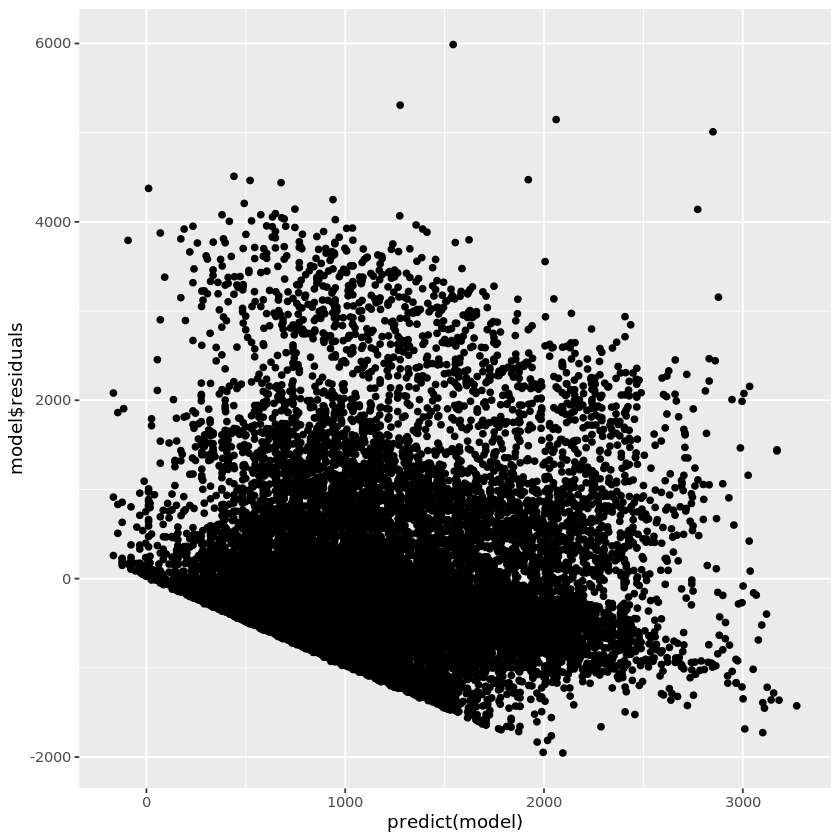

In [39]:
ggplot() + geom_point(aes(x = predict(model), y = model$residuals))

This proves an equal variance.

## <font color=blue>Conclusion</font>

#### How's the demand of bike-sharing on weekdays and weekend?

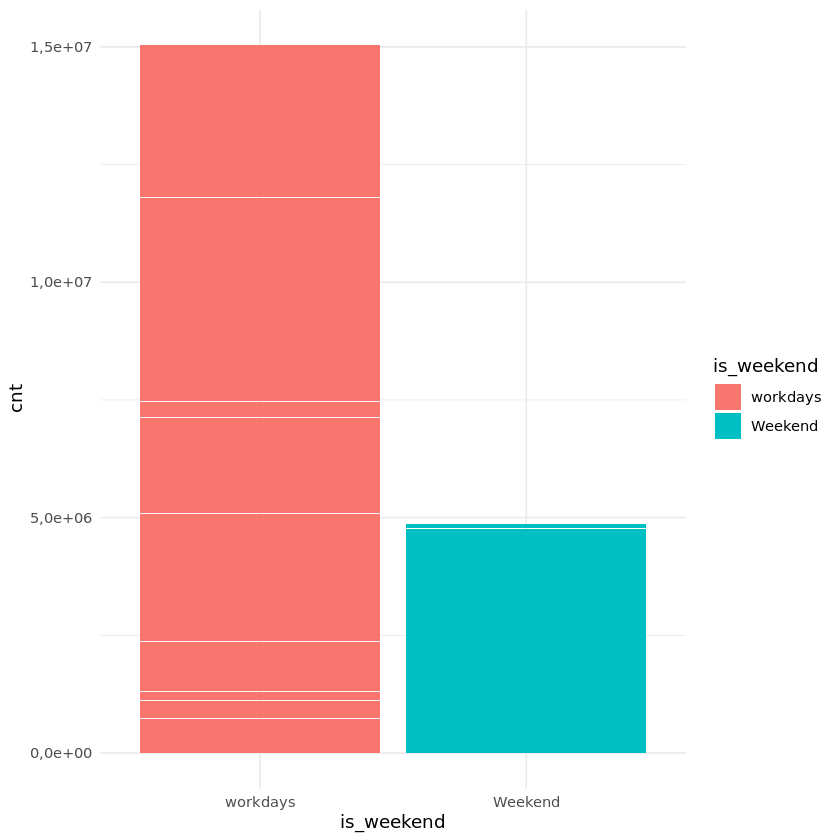

In [40]:
ggplot(bike, aes(x=is_weekend, y=cnt, fill = is_weekend)) + 
geom_bar(stat = "identity") +
theme_minimal()

The bar above shows that the demand for bike-sharing is high when it is not a weekend.

#### How's the demand of bike-sharing on holiday and when it is not a holiday?

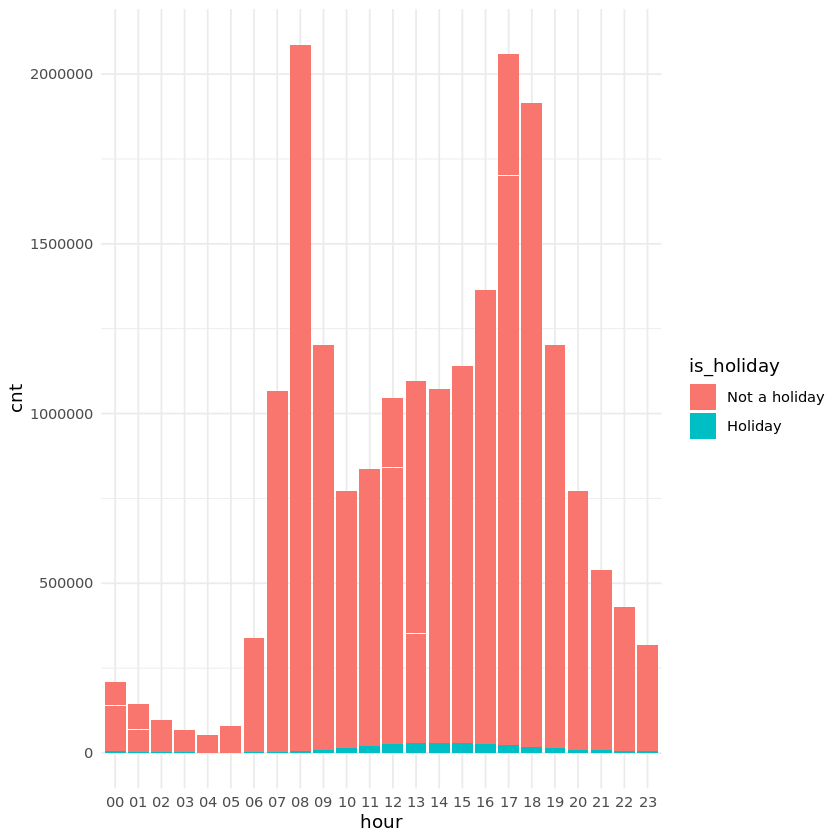

In [41]:
ggplot(bike, aes(x=hour, y=cnt, fill = is_holiday)) + 
geom_bar(stat = "identity")  +
theme_minimal()

The bar above shows that the demand for bike-sharing is very high when it is not a holiday. It can be seen what times are busy hours.

#### How's the demand in different season and the month?

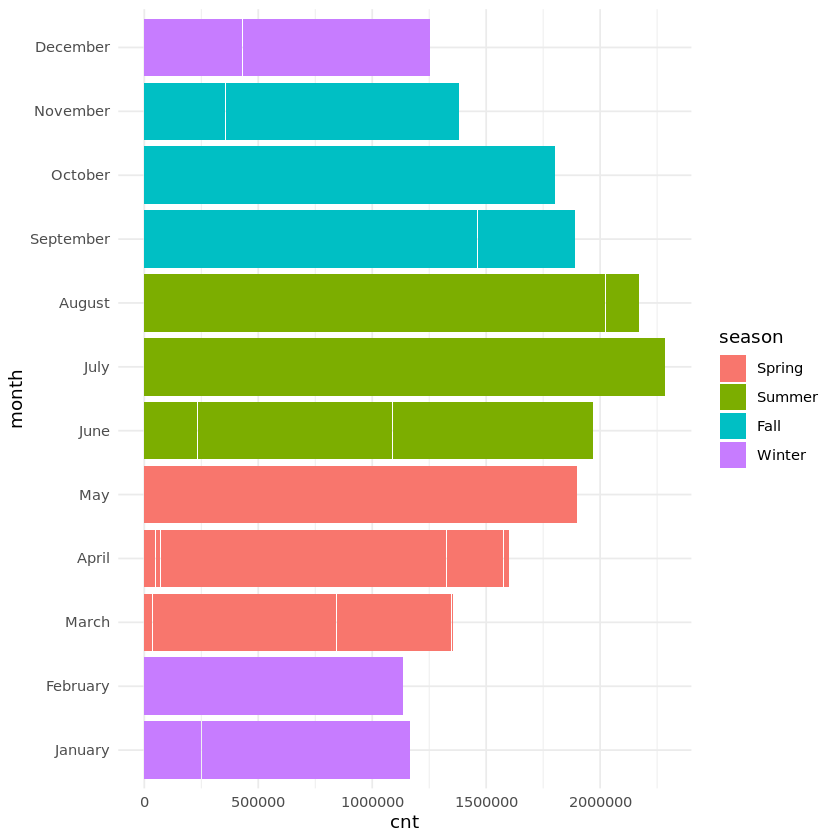

In [42]:
ggplot(bike, aes(x=month, y=cnt, fill = season)) + 
geom_bar(stat = "identity") + 
coord_flip() +
theme_minimal()

Above bar shows that the demand is higher in summer and lower in winter where spring and fall are almost the same.

#### How's the booking on a different time of the month?

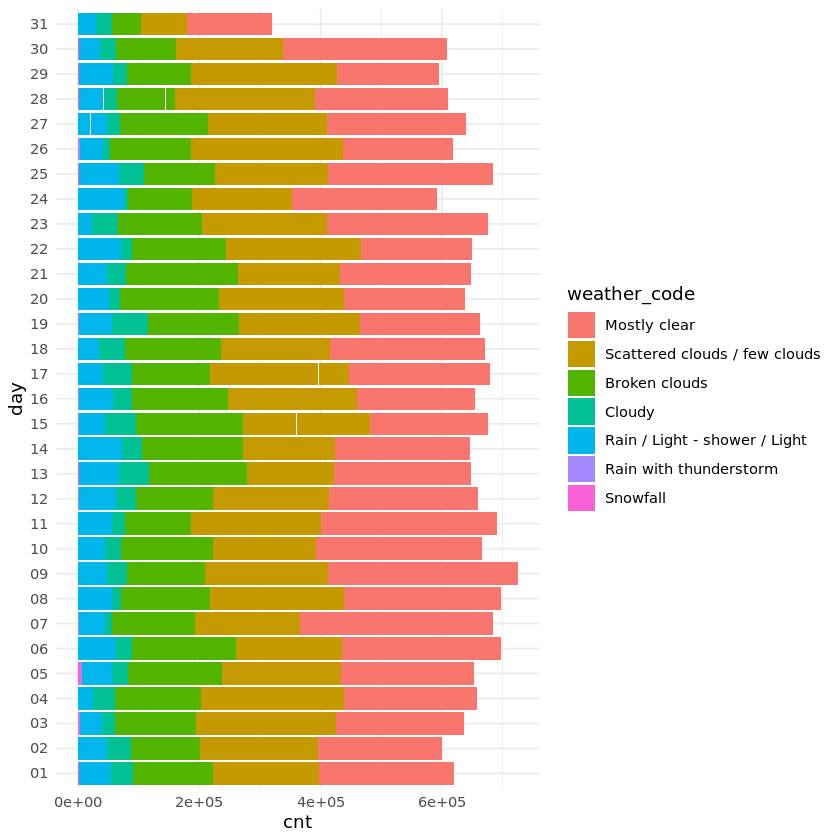

In [43]:
ggplot(bike, aes(x=day, y=cnt, fill = weather_code)) + 
geom_bar(stat = "identity") + 
coord_flip() +
theme_minimal()

Above bar shows that there is not so much difference between days in a month.

#### How's the demand during the time?

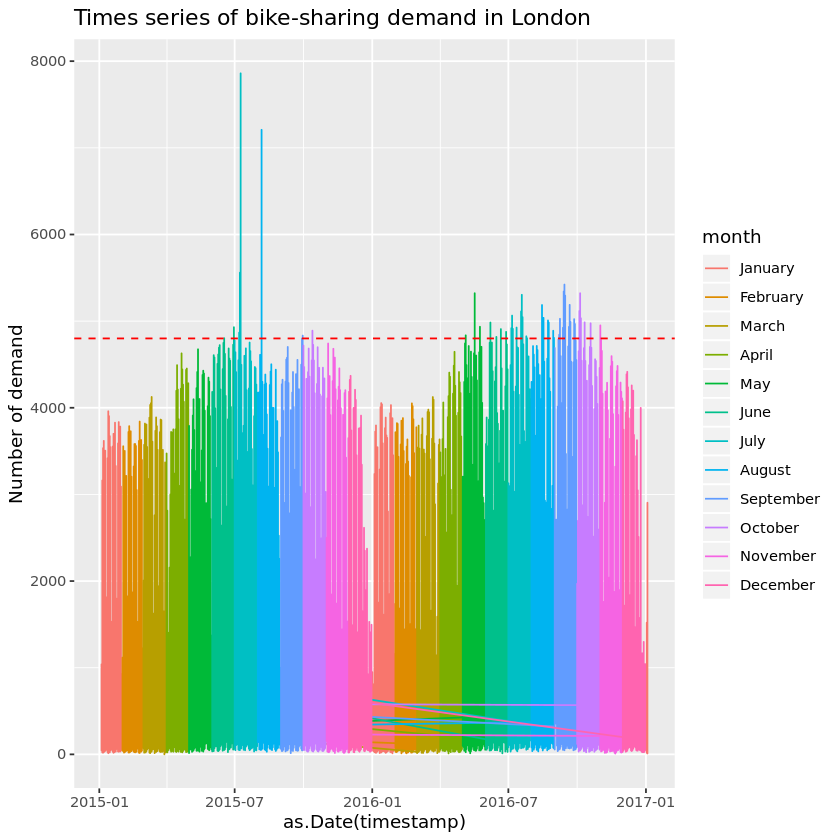

In [44]:
ggplot(data = bike) + geom_line(aes(x = as.Date(timestamp), y = cnt, color = month)) +
    ggtitle("Times series of bike-sharing demand in London") +
    ylab("Number of demand") + 
    geom_hline(yintercept=4800, linetype="dashed", color = "red")


The result above shows that the trend of bike-sharing demand is almost the same during the years. But by looking at the dotted horizontal line, it can be seen that the demand is slowly increasing within the years.

#### Does the temperature, humidity and wind speed affect the demand?

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


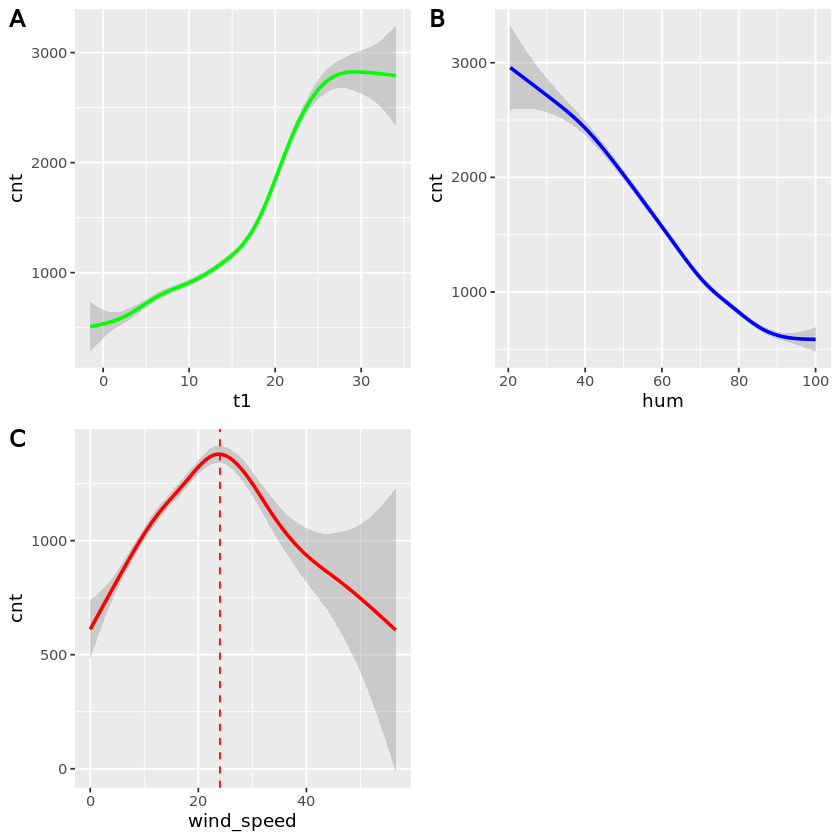

In [45]:
cntt1 <- ggplot(data = bike) + geom_smooth(aes(t1, cnt), color ="green")

cnthum <- ggplot(data = bike) + geom_smooth(aes(hum, cnt), color ="blue")

cntwind <- ggplot(data = bike) + geom_smooth(aes(wind_speed, cnt), color ="red") + geom_vline(xintercept=24, linetype="dashed", color = "red")

plot_grid(cntt1, cnthum, cntwind, labels = "AUTO")

The diagrams above shows different line where the green one is <font color="green">Temperature</font>, blue one is <font color="blue">Humidity</font> and the red one is <font color="red">Count</font>.

It can be seen that when the temperature increases the demand also increases, when the hum increases the demand decreases and when the wind speed increases up to 24 the demand increases after that the demand decreases.

By using the model, company can predict or the company will know how's the demand for bike-sharing in the different weather situations. The company can manage distribution of bikes according to the result of the model. Just by providing temperature and humidity, the model can predict bike-sharing demand. By knowing the demand, company can also manage how many employee they need for a day, how much money they make and other related things.

## <font color=blue>Big data and storage</font>

The size of the dataset is about 1 megabyte. One can argue that size of data might not be enough to predict the future of bike-sharing in London. But we have analyzed this dataset from different viewpoints and found dataset offer all the variable and factors that affect the mood of people to ride bicycles. Because of dataset size storage of such a small dataset is not a problem in our case.

While selecting from a database vs data warehouse, data warehouse would be a better solution for our database as it does not have the real-time data and neither time-critical. As being stored in the data warehouse data can be accessible across the globe and anyone can use it for better understanding of the use of bikes.


## <font color=blue>Reflection on ethical and legal issues</font>

Dataset is being used in our project us provided by TLF(Transport for London)whose main goal is to predict the future of bike-sharing in London.

TLF Reuse policy states:

“You are free to:

Copy, publish, distribute and transmit the Information, Adapt the Information and Exploit the Information commercially and non-commercially for example, by combining it with other Information, or by including it in Your own product or application”

Dataset is being used only for study purpose having ethical values in mind. We have not modified or did any changes to original data which can create privacy and security problems in the long run. Moreover, there is not any personal data is being found in the dataset so the concept of GDPR is not ethical in this case.
